In [20]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


#Import all the necessary modules

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report,accuracy_score
from scipy.stats import zscore

import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np


from sklearn import metrics

from matplotlib import pyplot as plt

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression





In [3]:
Bank = pd.read_csv("TheraBank.csv")    # read data into a dataframe

In [4]:
Bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
Bank.shape

(5000, 14)

In [8]:
Bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
Bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


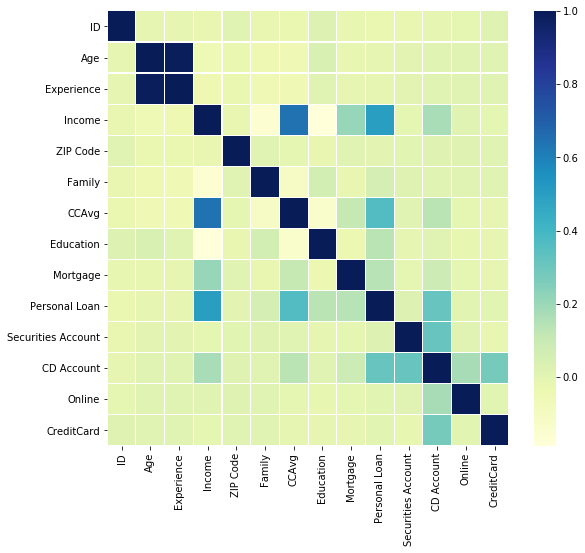

In [15]:
corrmat = Bank.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [16]:
#based on correlation we can say that people who take personal loans have high relation with Income, CC avg and CD account

In [19]:
# The Target column is Personal loans  and it has 

Bank.groupby(["Personal Loan"]).count()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


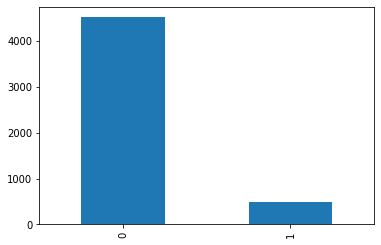

In [20]:
#Plot the values in the bar chart
Bank['Personal Loan'].value_counts().plot.bar()

In [8]:
x=Bank.drop(['ID','Age','Experience','ZIP Code','Family','Securities Account','Online','CreditCard'],axis=1) ## removing class column

y=Bank['Personal Loan']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=7)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 6)
(1500, 6)
(3500,)
(1500,)


In [ ]:
#  Model 1 Logistic Regression

In [29]:
# Fit the model on original data i.e. before upsampling

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

1.0
[[1362    0]
 [   0  138]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1362
           1       1.00      1.00      1.00       138

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



C:\Users\Mjoev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
model.score(x_test, y_test)

1.0

In [31]:
model.score(x_train , y_train) 

1.0

In [ ]:
# Model 2 KNN

In [13]:
# Call Nearest Neighbour algorithm
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [14]:
predicted_labels = NNH.predict(x_test)
print(predicted_labels)

[0 0 0 ... 0 0 0]


In [15]:
accuracy_score(y_test, predicted_labels)

0.9286666666666666

In [16]:
ac_scores2=[]

for k in range(1,20,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    ac_scores2.append((score,k))

ac_scores2

[(0.9526666666666667, 1),
 (0.9493333333333334, 3),
 (0.9433333333333334, 5),
 (0.946, 7),
 (0.9373333333333334, 9),
 (0.9333333333333333, 11),
 (0.932, 13),
 (0.9326666666666666, 15),
 (0.9293333333333333, 17),
 (0.928, 19)]

In [18]:
print("Optimal value of K value", max(ac_scores2)) ##maximum accuracy with the k value

Optimal value of K value (0.9526666666666667, 1)


In [23]:
print(confusion_matrix(y_test,y_pred))

[[1349   13]
 [  95   43]]


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1362
           1       0.77      0.31      0.44       138

    accuracy                           0.93      1500
   macro avg       0.85      0.65      0.70      1500
weighted avg       0.92      0.93      0.91      1500



In [ ]:
# Model 3 Naive Bayes

In [53]:
from sklearn.preprocessing import StandardScaler 

# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
model.score(x_train , y_train) 

1.0

In [27]:
model.score(x_test, y_test)

1.0

In [32]:
test_pred = model.predict(x_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1362
           1       1.00      1.00      1.00       138

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

[[1362    0]
 [   0  138]]


In [ ]:
# Conclusion

#We can select Logistic regression and NB Gausions model as it holds good accuarcy, precision and recall value .
#Eventhough KNN also holds good metrics as well, since our DV is highly skewed here, so KNN may not hold good here, since the model is based on the distanc

